# 📝 Exercise M4.03

Now, we tackle a more realistic classification problem instead of making a
synthetic dataset. We start by loading the Adult Census dataset with the
following snippet. For the moment we retain only the **numerical features**.

In [47]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


We confirm that all the selected features are numerical.

Compute the generalization performance in terms of accuracy of a linear model
composed of a `StandardScaler` and a `LogisticRegression`. Use a 10-fold
cross-validation with `return_estimator=True` to be able to inspect the
trained estimators.

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression()
)

cv_results = cross_validate(logistic_regression, data, target, cv=10, return_estimator=True) #bast mae = 0

print(f'mean : {cv_results["test_score"].mean()}')
print(f'std : {cv_results["test_score"].std()}')


mean : 0.7998650409039354
std : 0.0037395111246827104


What is the most important feature seen by the logistic regression?

You can use a boxplot to compare the absolute values of the coefficients while
also visualizing the variability induced by the cross-validation resampling.

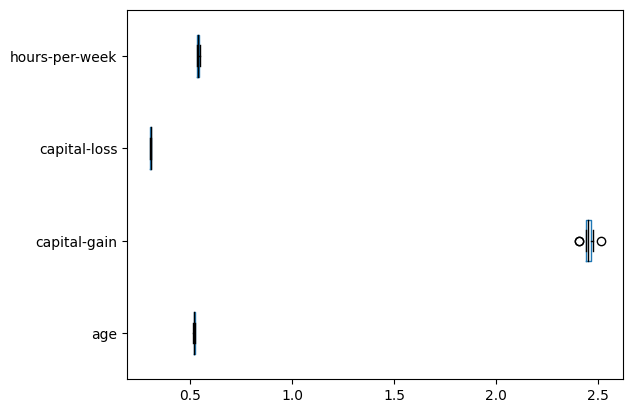

In [49]:
import matplotlib.pyplot as plt

# we find the highest coeffs : https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

# print(vars(cv_results["estimator"][0][-1]))
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
_, ax = plt.subplots()
_ = coefs.abs().plot.box(color=color, vert=False, ax=ax)



Let's now work with **both numerical and categorical features**. You can
reload the Adult Census dataset with the following snippet:

In [50]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [51]:
# data.dtypes

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

Create a predictive model where:
- The numerical data must be scaled.
- The categorical data must be one-hot encoded, set `min_frequency=0.01` to
  group categories concerning less than 1% of the total samples.
- The predictor is a `LogisticRegression`. You may need to increase the number
  of `max_iter`, which is 100 by default.

Use the same 10-fold cross-validation strategy with `return_estimator=True` as
above to evaluate this complex pipeline.

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder    
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    [("categorical", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), categorical_columns),
     ("numerical", StandardScaler(), numerical_columns)]
)
logistic_regression = make_pipeline(
    preprocessor, LogisticRegression(max_iter=500)
)

cv_results_2 = cross_validate(logistic_regression, data, target, cv=10, return_estimator=True) #bast mae = 0

cv_results_2

{'fit_time': array([0.35492063, 0.37484169, 0.36514139, 0.34166646, 0.37500525,
        0.46690249, 0.3100431 , 0.3348968 , 0.32000756, 0.32169461]),
 'score_time': array([0.01079369, 0.01004076, 0.01599765, 0.01232886, 0.01503372,
        0.00306511, 0.00986004, 0.01337647, 0.01172376, 0.01248741]),
 'estimator': [Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('categorical',
                                                    OneHotEncoder(handle_unknown='ignore',
                                                                  min_frequency=0.01),
                                                    ['workclass', 'education',
                                                     'marital-status',
                                                     'occupation', 'relationship',
                                                     'race', 'sex',
                                                     'native-country']),
                          

By comparing the cross-validation test scores of both models fold-to-fold,
count the number of times the model using both numerical and categorical
features has a better test score than the model using only numerical features.

In [53]:
print(f'mean : {cv_results_2["test_score"].mean()}')
print(f'std : {cv_results_2["test_score"].std()}')

count = 0
for num_cat, num in zip(cv_results_2["test_score"], cv_results["test_score"]):
    if (num_cat > num):
        count += 1

print(f'the numerical-categorical model is better in {count} situations')

mean : 0.8512140995559625
std : 0.0035306295354508286
10


For the following questions, you can copy and paste the following snippet to
get the feature names from the column transformer here named `preprocessor`.

```python
preprocessor.fit(data)
feature_names = (
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
        categorical_columns
    )
).tolist()
feature_names += numerical_columns
feature_names
```

In [60]:
preprocessor.fit(data)
feature_names = (
    preprocessor.named_transformers_["categorical"].get_feature_names_out(
        categorical_columns
    )
).tolist()
feature_names += numerical_columns
feature_names


['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_infrequent_sklearn',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Prof-school',
 'education_ Some-college',
 'education_infrequent_sklearn',
 'marital-status_ Divorced',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'marital-status_infrequent_sklearn',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Ma

Notice that there are as many feature names as coefficients in the last step
of your predictive pipeline.

Which of the following pairs of features is most impacting the predictions of
the logistic regression classifier based on the absolute magnitude of its
coefficients?

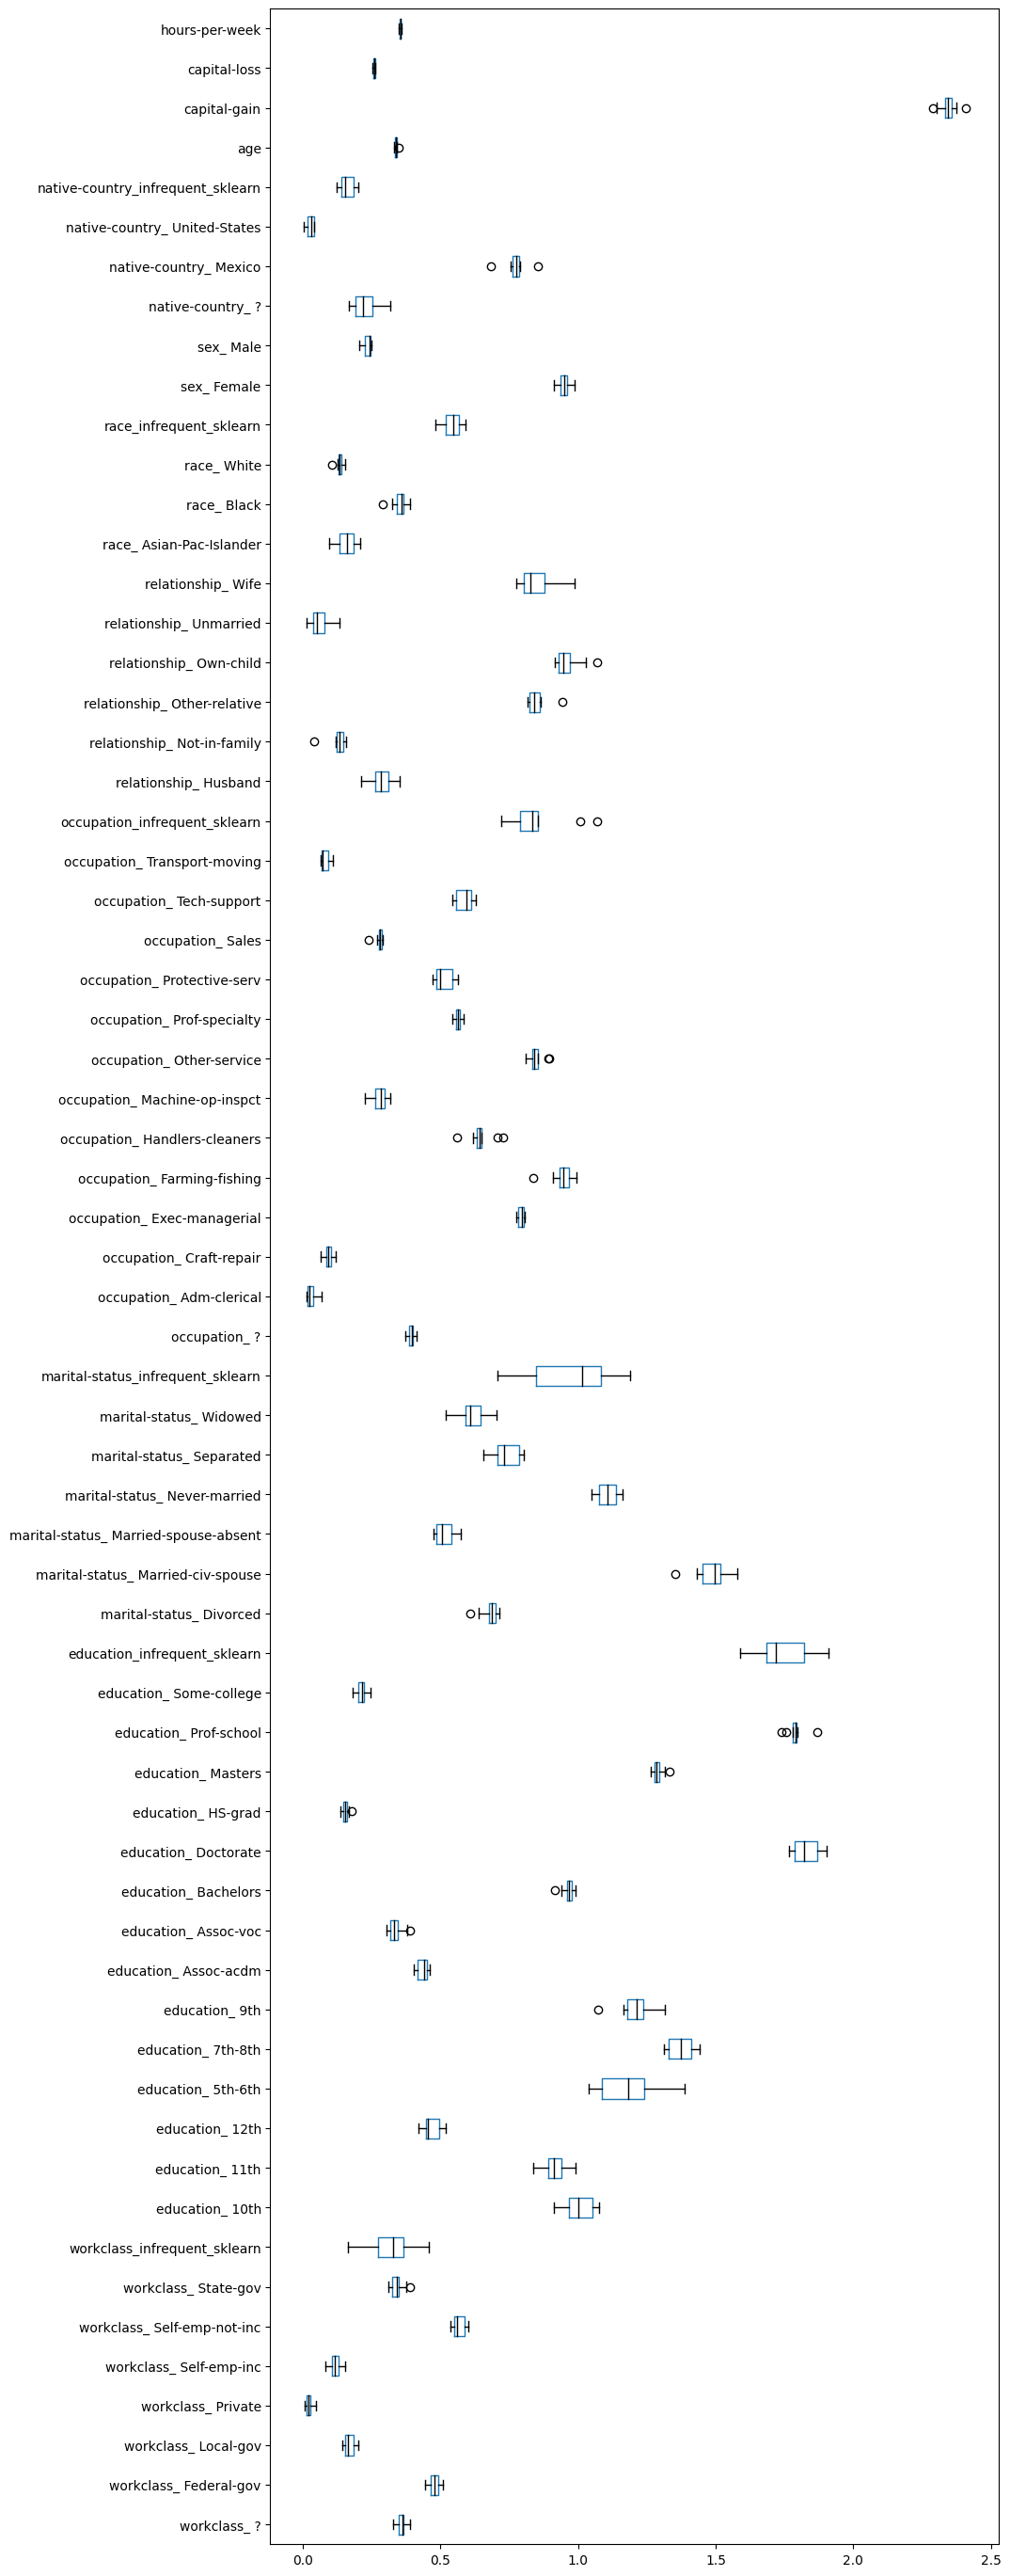

In [65]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results_2["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(color=color, vert=False, ax=ax)


Now create a similar pipeline consisting of the same preprocessor as above,
followed by a `PolynomialFeatures` and a logistic regression with `C=0.01`.
Set `degree=2` and `interaction_only=True` to the feature engineering step.
Remember not to include a "bias" feature to avoid introducing a redundancy
with the intercept of the subsequent logistic regression.

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder    
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


preprocessor = ColumnTransformer(
    [("categorical", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), categorical_columns),
     ("numerical", StandardScaler(), numerical_columns)]
)

logistic_regression = make_pipeline(
    preprocessor, PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), LogisticRegression(C=0.01)
)

cv_results_3 = cross_validate(logistic_regression, data, target, cv=10, return_estimator=True)

cv_results_3

{'fit_time': array([0.76673079, 0.73824406, 0.78679204, 0.78514218, 0.80570865,
        0.8172667 , 0.79382968, 0.75121379, 0.79727578, 0.77168417]),
 'score_time': array([0.02103639, 0.02207756, 0.0201056 , 0.01740217, 0.02133799,
        0.01779723, 0.01946211, 0.02186441, 0.01764941, 0.02228427]),
 'estimator': [Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('categorical',
                                                    OneHotEncoder(handle_unknown='ignore',
                                                                  min_frequency=0.01),
                                                    ['workclass', 'education',
                                                     'marital-status',
                                                     'occupation', 'relationship',
                                                     'race', 'sex',
                                                     'native-country']),
                          

By comparing the cross-validation test scores of both models fold-to-fold,
count the number of times the model using multiplicative interactions and both
numerical and categorical features has a better test score than the model
without interactions.

In [69]:
count = 0
for num_cat, num_cat_poly in zip(cv_results_2["test_score"], cv_results_3["test_score"]):
    if (num_cat_poly > num_cat):
        count += 1

print(count)

8
